## Capstone - Road Accident Severity

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [1]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-26 18:55:57--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  36.3MB/s   in 1.9s   

2020-09-26 18:56:00 (36.3 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
df = pd.read_csv("Data-Collisions.csv")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
summaryStatistics = df.describe().transpose()

In [5]:
summaryStatistics.sort_values(by=['std'])

,count,mean,std,min,25%,50%,75%,max
X,189339.0,-1.223305e+02,2.997605e-02,-1.224191e+02,-1.223487e+02,-1.223302e+02,-1.223119e+02,-1.222389e+02
Y,189339.0,4.761954e+01,5.615664e-02,4.749557e+01,4.757596e+01,4.761537e+01,4.766366e+01,4.773414e+01
PEDCYLCOUNT,194673.0,2.839120e-02,1.674128e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
PEDCOUNT,194673.0,3.713920e-02,1.981499e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
SEVERITYCODE,194673.0,1.298901e+00,4.577776e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
SEVERITYCODE.1,194673.0,1.298901e+00,4.577776e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
VEHCOUNT,194673.0,1.920780e+00,6.310467e-01,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.200000e+01
PERSONCOUNT,194673.0,2.444427e+00,1.345929e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,8.100000e+01
SDOT_COLCODE,194673.0,1.386777e+01,6.868755e+00,0.000000e+00,1.100000e+01,1.300000e+01,1.400000e+01,6.900000e+01
SEGLANEKEY,194673.0,2.694011e+02,3.315776e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.252410e+05


In [6]:
numerical_features = list(summaryStatistics.index)

In [7]:
categorical_features = [i for i in df.columns if i not in numerical_features]

In [8]:

df_unique = pd.DataFrame(df[numerical_features].T.apply(lambda x: x.nunique(), axis=1))

In [9]:
df_unique.columns=['Unique_count']
df_unique.sort_values(by=['Unique_count'])

,Unique_count
SEVERITYCODE,2
SEVERITYCODE.1,2
PEDCYLCOUNT,3
PEDCOUNT,7
VEHCOUNT,13
SDOT_COLCODE,39
PERSONCOUNT,47
SEGLANEKEY,1955
CROSSWALKKEY,2198
INTKEY,7614


In [10]:
df[categorical_features].describe(include='all').transpose().sort_values(by='unique')

,count,unique,top,freq
SPEEDING,9333,1,Y,9333
EXCEPTRSNDESC,5638,1,"Not Enough Information, or Insufficient Locati...",5638
PEDROWNOTGRNT,4667,1,Y,4667
INATTENTIONIND,29805,1,Y,29805
HITPARKEDCAR,194673,2,N,187457
STATUS,194673,2,Matched,189786
EXCEPTRSNCODE,84811,2,,79173
SEVERITYDESC,194673,2,Property Damage Only Collision,136485
ADDRTYPE,192747,3,Block,126926
UNDERINFL,189789,4,N,100274


#### 1. Removing Numerical columns OBJECTID, INCKEY, COLDETKEY, REPORTNO as they are Keys and no won't add value to Prediction
#### 2. Removing constant values columns SPEEDING, EXCEPTRSNDESC, PEDROWNOTGRNT, INATTENTIONIND as these values are not going to add impact to prediction and mostly unkown for most of the observations
#### 3. Removing Description columns SDOT_COLDESC, ST_COLDESC, SEVERITYDESC as we also have corresponding codes

In [11]:
drop_col_list = ['OBJECTID','INCKEY','COLDETKEY','REPORTNO',
         'SPEEDING', 'EXCEPTRSNDESC', 'PEDROWNOTGRNT', 'INATTENTIONIND',
         'SDOT_COLDESC', 'ST_COLDESC', 'SEVERITYDESC']

numerical_features=[i for i in numerical_features if i not in drop_col_list]
categorical_features=[i for i in categorical_features if i not in drop_col_list]

df.drop(drop_col_list, axis = 1, inplace=True)

#### Prediction Label frequency to check the dataset balance state

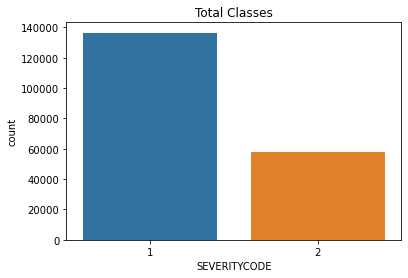

In [12]:
sns.countplot('SEVERITYCODE', data=df)
plt.title('Total Classes')
plt.show()

#### It is clearly representing more than half imbalance in the data

### Creating Balanced Sample by doing Under Sampling

In [13]:
df_shuffled=df.sample(frac=1,random_state=4)
df_under_1=df_shuffled.loc[df_shuffled['SEVERITYCODE'] == 1].sample(n=57159,random_state=42)
df_under_2=df_shuffled.loc[df_shuffled['SEVERITYCODE'] == 2]
df_over_2=df_shuffled.loc[df_shuffled['SEVERITYCODE'] == 2].sample(n=18309,random_state=42)
df_under_sample = pd.concat([df_under_1, df_under_2])
df_over_sample = pd.concat([df_shuffled, df_under_2, df_over_2])


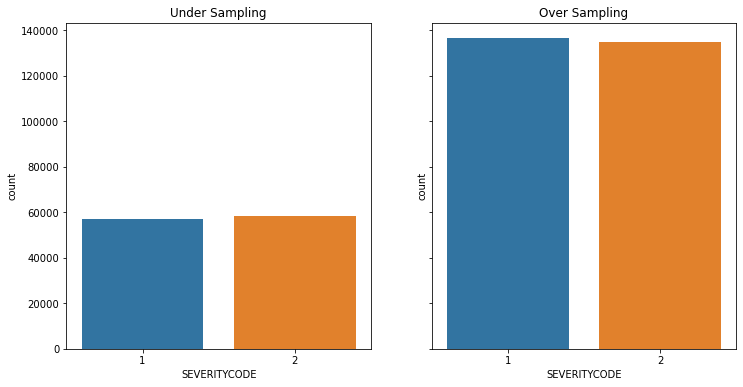

In [14]:
fig, ax =plt.subplots(1,2, sharey=True,figsize=(12, 6))
sns.countplot(df_under_sample['SEVERITYCODE'], ax=ax[0])
sns.countplot(df_over_sample['SEVERITYCODE'], ax=ax[1])
ax[0].set_title('Under Sampling')
ax[1].set_title('Over Sampling')
fig.show()


#### Date column analysis by extracting day features

In [15]:


df_under_sample['INCDATE'] = pd.to_datetime(df_under_sample['INCDATE'])

df_under_sample['day_of_week'] = df_under_sample['INCDATE'].dt.day_name()

<AxesSubplot:>

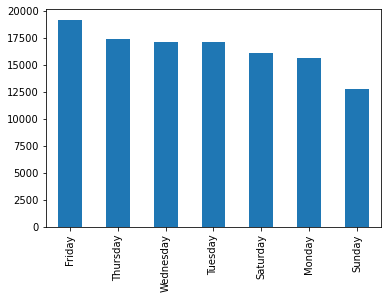

In [16]:
df_under_sample['day_of_week'].value_counts().plot.bar()

#### Next set of Low Distinct columns Analysis on Label Column(SEVERITYCODE)
###### ['STATUS','EXCEPTRSNCODE','UNDERINFL']

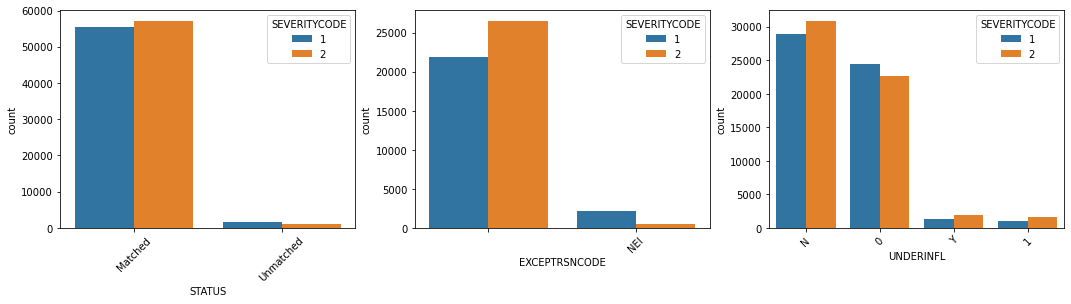

In [17]:
f, ax = plt.subplots(1,3,figsize=(18, 4))
sns.countplot(x='STATUS', hue='SEVERITYCODE',data=df_under_sample,order=df_under_sample['STATUS'].value_counts().index,ax=ax[0])
sns.countplot(x='EXCEPTRSNCODE', hue='SEVERITYCODE',data=df_under_sample,order=df_under_sample['EXCEPTRSNCODE'].value_counts().index,ax=ax[1])
sns.countplot(x='UNDERINFL', hue='SEVERITYCODE',data=df_under_sample,order=df_under_sample['UNDERINFL'].value_counts().index,ax=ax[2])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
f.show()

#### ['STATUS','EXCEPTRSNCODE','UNDERINFL'] In each field severity distribution is similar we can ignore these columns

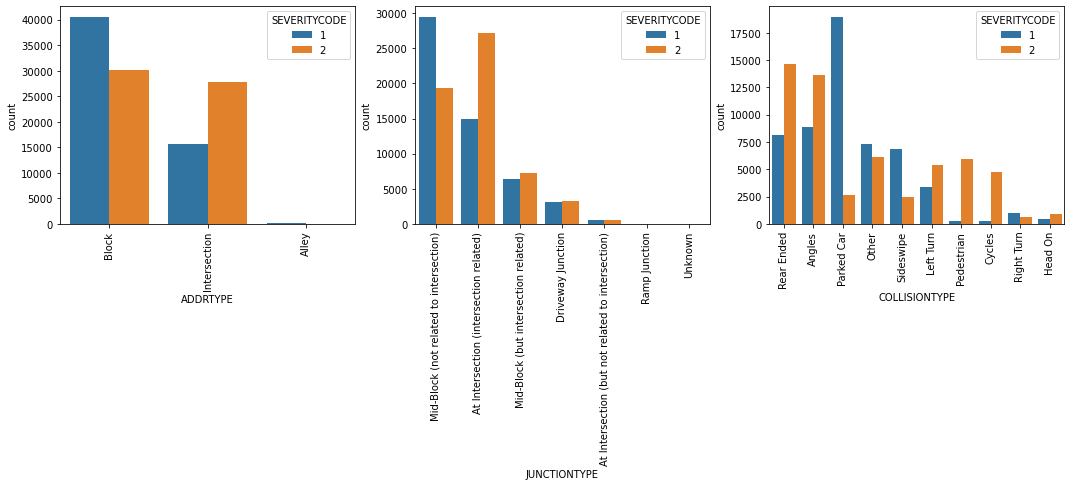

In [18]:
f, ax = plt.subplots(1,3,figsize=(18, 4))
sns.countplot(x='ADDRTYPE', hue='SEVERITYCODE',data=df_under_sample,order=df_under_sample['ADDRTYPE'].value_counts().index,ax=ax[0])
sns.countplot(x='JUNCTIONTYPE', hue='SEVERITYCODE',data=df_under_sample,order=df_under_sample['JUNCTIONTYPE'].value_counts().index,ax=ax[1])
sns.countplot(x='COLLISIONTYPE', hue='SEVERITYCODE',data=df_under_sample,order=df_under_sample['COLLISIONTYPE'].value_counts().index,ax=ax[2])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
f.show()

#### ['ADDRTYPE','JUNCTIONTYPE','COLLISIONTYPE'] In each field severity distribution is havind correlation we can include these columns

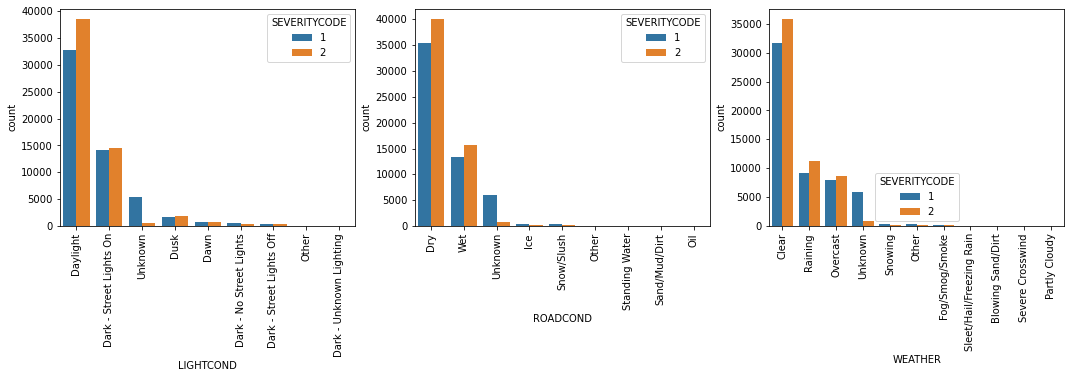

In [19]:
f, ax = plt.subplots(1,3,figsize=(18, 4))
sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE',data=df_under_sample,order=df_under_sample['LIGHTCOND'].value_counts().index,ax=ax[0])
sns.countplot(x='ROADCOND', hue='SEVERITYCODE',data=df_under_sample,order=df_under_sample['ROADCOND'].value_counts().index,ax=ax[1])
sns.countplot(x='WEATHER', hue='SEVERITYCODE',data=df_under_sample,order=df_under_sample['WEATHER'].value_counts().index,ax=ax[2])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
f.show()

##### ['LIGHTCOND','ROADCOND','WEATHER'] Severity distribution is having some correlation with fields so we can include these columns and test the performance

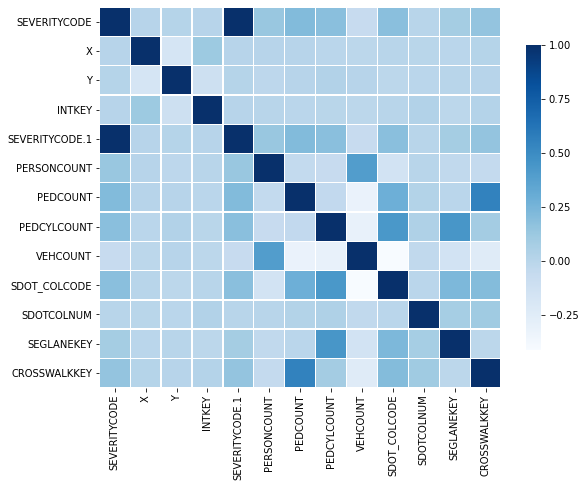

In [20]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df_under_sample[numerical_features].corr(), cmap="Blues",
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()



#### We can see very low correlation of all numerical variables with SEVERITYCODE

In [21]:
df_under_sample[numerical_features].corr()

,SEVERITYCODE,X,Y,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.009715,0.019968,0.010541,1.000000,0.137241,0.215229,0.187809,-0.056914,0.189944,0.007467,0.089017,0.153012
X,0.009715,1.000000,-0.162926,0.120712,0.009715,0.012086,0.012132,-0.003879,-0.011069,0.007050,0.000422,-0.003221,0.015530
Y,0.019968,-0.162926,1.000000,-0.107830,0.019968,-0.014924,0.011177,0.032705,0.011720,-0.011717,-0.004807,0.005624,0.010912
INTKEY,0.010541,0.120712,-0.107830,1.000000,0.010541,0.004371,-0.004030,0.001851,-0.011895,0.005662,0.035564,-0.012159,0.025705
SEVERITYCODE.1,1.000000,0.009715,0.019968,0.010541,1.000000,0.137241,0.215229,0.187809,-0.056914,0.189944,0.007467,0.089017,0.153012
PERSONCOUNT,0.137241,0.012086,-0.014924,0.004371,0.137241,1.000000,-0.041458,-0.059155,0.401516,-0.140296,0.008898,-0.031078,-0.048020
PEDCOUNT,0.215229,0.012132,0.011177,-0.004030,0.215229,-0.041458,1.000000,-0.035116,-0.309789,0.288468,0.027936,-0.006171,0.559436
PEDCYLCOUNT,0.187809,-0.003879,0.032705,0.001851,0.187809,-0.059155,-0.035116,1.000000,-0.299572,0.433842,0.044602,0.447397,0.096868
VEHCOUNT,-0.056914,-0.011069,0.011720,-0.011895,-0.056914,0.401516,-0.309789,-0.299572,1.000000,-0.408821,-0.030750,-0.143410,-0.235704
SDOT_COLCODE,0.189944,0.007050,-0.011717,0.005662,0.189944,-0.140296,0.288468,0.433842,-0.408821,1.000000,-0.005578,0.233861,0.207747


#### Numerical columns correlation is very low 

In [22]:

import sklearn
from sklearn import preprocessing

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

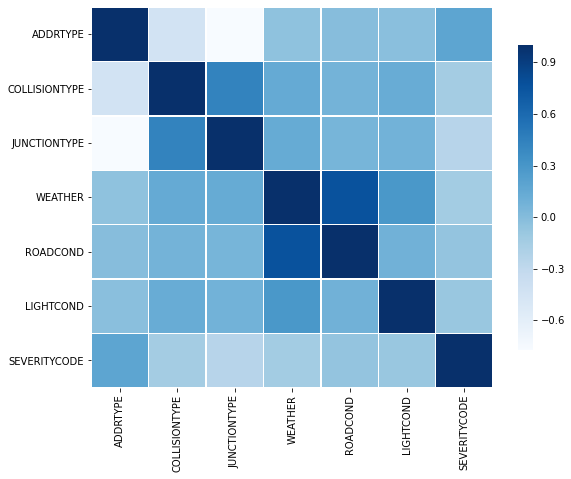

In [23]:
temp = df_under_sample[['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SEVERITYCODE']]

le = preprocessing.LabelEncoder()
temp['ROADCOND'] = le.fit_transform(temp['ROADCOND'].astype(str))
temp['ADDRTYPE'] = le.fit_transform(temp['ADDRTYPE'].astype(str))
temp['COLLISIONTYPE'] = le.fit_transform(temp['COLLISIONTYPE'].astype(str))
temp['JUNCTIONTYPE'] = le.fit_transform(temp['JUNCTIONTYPE'].astype(str))
temp['WEATHER'] = le.fit_transform(temp['WEATHER'].astype(str))
temp['ROADCOND'] = le.fit_transform(temp['ROADCOND'].astype(str))
temp['LIGHTCOND'] = le.fit_transform(temp['LIGHTCOND'].astype(str))

fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(temp.corr(), cmap="Blues",
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

#### Weather and RoadCond are correlating each other so I can remove raod condition
#### Similarly COLLISIONTYPE can be removed

In [24]:
temp.corr()

,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
ADDRTYPE,1.000000,-0.433771,-0.769754,-0.040715,-0.008060,-0.016923,0.186954
COLLISIONTYPE,-0.433771,1.000000,0.435922,0.148210,0.079310,0.134749,-0.140407
JUNCTIONTYPE,-0.769754,0.435922,1.000000,0.142392,0.063215,0.085407,-0.240628
WEATHER,-0.040715,0.148210,0.142392,1.000000,0.767278,0.291644,-0.127520
ROADCOND,-0.008060,0.079310,0.063215,0.767278,1.000000,0.092070,-0.060213
LIGHTCOND,-0.016923,0.134749,0.085407,0.291644,0.092070,1.000000,-0.078955
SEVERITYCODE,0.186954,-0.140407,-0.240628,-0.127520,-0.060213,-0.078955,1.000000


### Feature Engineering and Training and Test data creation

In [25]:
final_features=['ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER', 'LIGHTCOND','PEDCOUNT']
label='SEVERITYCODE'

In [26]:
data=df[['ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER', 'LIGHTCOND','PEDCOUNT','SEVERITYCODE']]
le = preprocessing.LabelEncoder()
data['ADDRTYPE'] = le.fit_transform(data['ADDRTYPE'].astype(str))
data['JUNCTIONTYPE'] = le.fit_transform(data['JUNCTIONTYPE'].astype(str))
data['WEATHER'] = le.fit_transform(data['WEATHER'].astype(str))
data['LIGHTCOND'] = le.fit_transform(data['LIGHTCOND'].astype(str))
data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

,ADDRTYPE,JUNCTIONTYPE,WEATHER,LIGHTCOND,PEDCOUNT,SEVERITYCODE
0,2,1,4,5,0,2
1,1,4,6,2,0,1
2,1,4,4,5,0,1
3,1,4,1,5,0,1
4,2,1,6,5,0,2
...,...,...,...,...,...,...
194668,1,4,1,5,0,2
194669,1,4,6,5,0,1
194670,2,1,1,5,0,2
194671,2,1,1,6,0,2


In [27]:
df_shuffled=data.sample(frac=1,random_state=4)
df_under_1=df_shuffled.loc[df_shuffled['SEVERITYCODE'] == 1].sample(n=57159,random_state=42)
df_under_2=df_shuffled.loc[df_shuffled['SEVERITYCODE'] == 2]
df_over_2=df_shuffled.loc[df_shuffled['SEVERITYCODE'] == 2].sample(n=18309,random_state=42)
df_under_sample = pd.concat([df_under_1, df_under_2])
df_over_sample = pd.concat([df_shuffled, df_under_2, df_over_2])



In [28]:
data_1=data.loc[data['SEVERITYCODE'] == 1]
data_2=data.loc[data['SEVERITYCODE'] == 2]
X_1=data_1[final_features]
y_1=data_1[label]

X_2=data_2[final_features]
y_2=data_2[label]

In [29]:
from sklearn.model_selection import train_test_split

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(
    X_1, y_1, test_size=0.2, random_state=42)

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42)

X_train = pd.concat([X_1_train, X_2_train])
X_test = pd.concat([X_1_test, X_2_test])

y_train = pd.concat([y_1_train, y_2_train])
y_test = pd.concat([y_1_test, y_2_test])


In [30]:
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [31]:

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

# K Nearest Neighbor(KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [62]:
Ks = 11
mean_acc = np.zeros((Ks-2))
std_acc = np.zeros((Ks-2))
ConfustionMx = [];
for n in range(2,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-2] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-2]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.72508026, 0.72836779, 0.72775138, 0.72859895, 0.728676  ,
       0.73037113, 0.73034545, 0.73024271, 0.73034545])

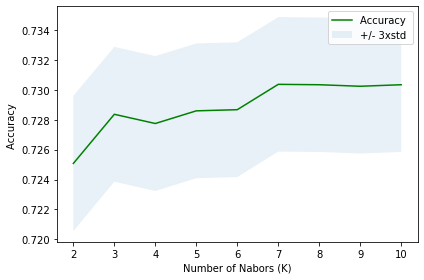

In [63]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.fill_between(range(2,Ks),mean_acc - 2 * std_acc,mean_acc + 2 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)

#### K=7 is where we have best Accuracy

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)


# Support Vector Machine

In [59]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
ker = ['linear']#, 'poly', 'linear', 'sigmoid']
for i in ker:
    clf = svm.SVC(kernel=i)
    clf.fit(X_train, y_train)
    #yhat = clf.predict(X_test)
    #print("####################",i,"####################")
    #print (classification_report(y_test, yhat, labels=["PAIDOFF"]))

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

In [53]:
solvers=['sag', 'saga']#, 'newton-cg', 'lbfgs', 'liblinear']
#for sol in solvers:
    #regularization = [0.01,0.02,0.03,0.04,0.05]
    #for reg in regularization:
LR = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
        #yhat = LR.predict(X_test)
        #yhat_prob = LR.predict_proba(X_test)
        #print("C",reg,sol," log loss: ",log_loss(y_test, yhat_prob)," jaccard score: ",jaccard_similarity_score(y_test, yhat)," F1 score: ", f1_score(y_test, yhat))

# Model Evaluation using Test set

In [37]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
report = pd.DataFrame()

#### KNN taking K=7 which is giving better score

In [39]:
yhat=neigh.predict(X_test)
yhat_prob=neigh.predict_proba(X_test)

report=report.append({"Algorithm": "KNN" , "Jaccard": jaccard_similarity_score(y_test, yhat), "F1-score":f1_score(y_test, yhat), "LogLoss": 'NA'},ignore_index = True)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.72      0.99      0.84     27297
           2       0.90      0.11      0.20     11638

   micro avg       0.73      0.73      0.73     38935
   macro avg       0.81      0.55      0.52     38935
weighted avg       0.78      0.73      0.65     38935



Confusion matrix, without normalization
[[27159   138]
 [10353  1285]]


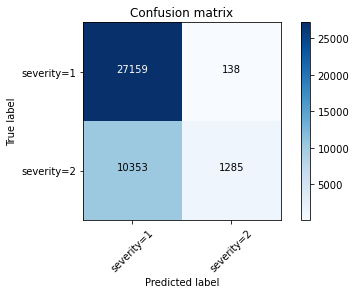

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=2'],normalize= False,  title='Confusion matrix')

#### Decision Trees is giving best results at Dept = 4 using entropy

In [49]:
yhat=drugTree.predict(X_test)
yhat_prob=drugTree.predict_proba(X_test)

report=report.append({"Algorithm": "Decision Tree" , "Jaccard": jaccard_similarity_score(y_test, yhat), "F1-score":f1_score(y_test, yhat), "LogLoss": 'NA'},ignore_index = True)

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.72      0.99      0.84     27297
           2       0.90      0.11      0.20     11638

   micro avg       0.73      0.73      0.73     38935
   macro avg       0.81      0.55      0.52     38935
weighted avg       0.78      0.73      0.65     38935



#### SVM is performing better with Ploynomial kernal

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

In [ ]:
yhat=clf.predict(X_test)

report=report.append({"Algorithm": "SVM" , "Jaccard": jaccard_similarity_score(y_test, yhat), "F1-score":f1_score(y_test, yhat), "LogLoss": 'NA'},ignore_index = True)
print (classification_report(y_test, yhat))

#### Logistic Regression is performing best with regularization val = 0.03 

In [54]:
yhat=LR.predict(X_test)
yhat_prob=LR.predict_proba(X_test)

report=report.append({"Algorithm": "LogisticRegression" , "Jaccard": jaccard_similarity_score(y_test, yhat), "F1-score":f1_score(y_test, yhat), "LogLoss": log_loss(y_test, yhat_prob)},ignore_index = True)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.72      0.99      0.84     27297
           2       0.88      0.11      0.20     11638

   micro avg       0.73      0.73      0.73     38935
   macro avg       0.80      0.55      0.52     38935
weighted avg       0.77      0.73      0.65     38935



Confusion matrix, without normalization
[[27124   173]
 [10338  1300]]


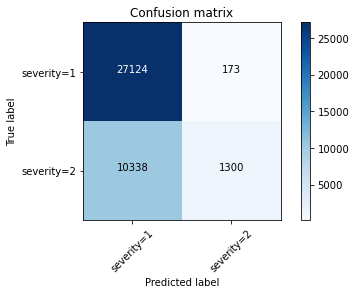

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=2'],normalize= False,  title='Confusion matrix')

In [57]:
report

,Algorithm,F1-score,Jaccard,LogLoss
0,KNN,0.837984,0.730371,NA
1,Decision Tree,0.838124,0.730551,NA
2,LogisticRegression,0.837691,0.730037,0.556894
